<a href="https://colab.research.google.com/github/ch3ngp3ng/DSE200_Python_for_Data_Analysis/blob/master/DSE230/creditcard/creditcard_pd_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv')

In [4]:
df

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[6362620 rows x 11 columns]

In [5]:
print(round(df.isFraud.sum()/len(df)*100,2),'%')

0.13 %


In [6]:
df.isFraud.sum()

8213

In [7]:
df.isFlaggedFraud.sum()

16

In [8]:
df.isFraud.sum() & df.isFlaggedFraud.sum()

16

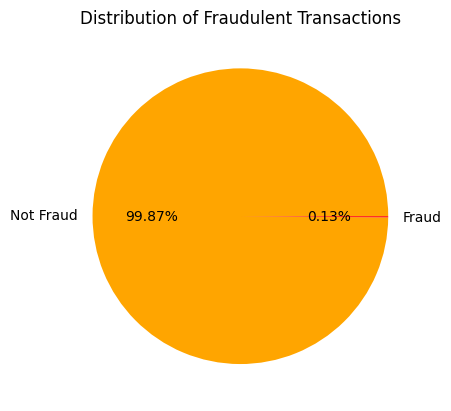

In [9]:
counts = df['isFraud'].value_counts().values
labels = ['Not Fraud', 'Fraud']
colors = ['orange', 'red']
plt.pie(counts, labels=labels, autopct='%1.2f%%', colors=colors)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

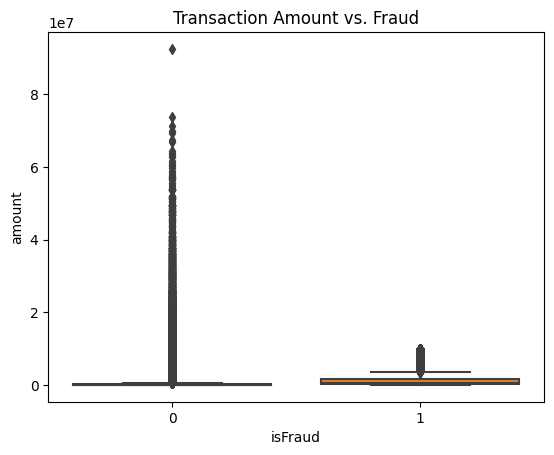

In [10]:
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount vs. Fraud')
plt.show()

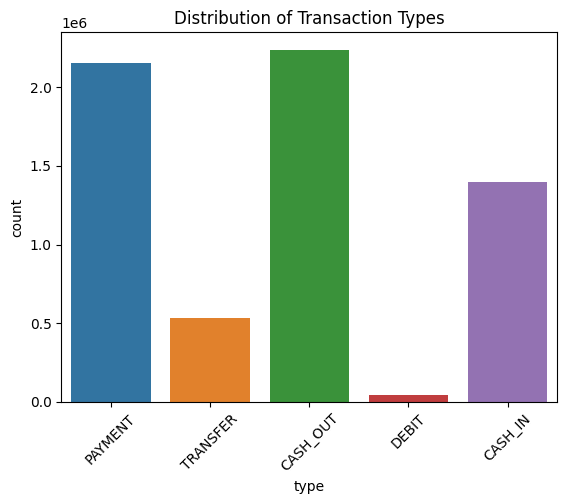

In [11]:
sns.countplot(x='type', data=df)
plt.title('Distribution of Transaction Types')
plt.xticks(rotation=45)
plt.show()

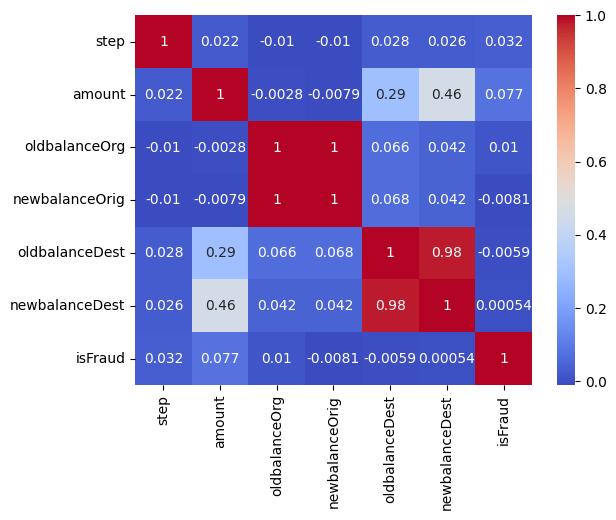

In [12]:
corr = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

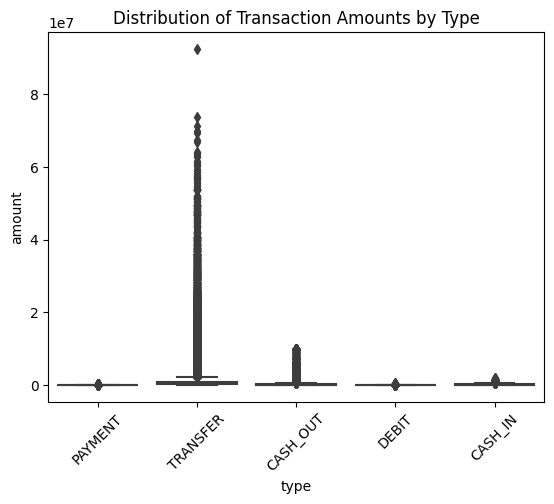

In [13]:
sns.boxplot(x='type', y='amount', data=df)
plt.title('Distribution of Transaction Amounts by Type')
plt.xticks(rotation=45)
plt.show()

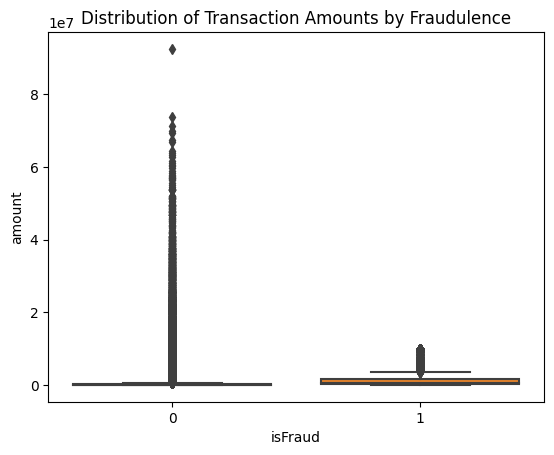

In [14]:
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Distribution of Transaction Amounts by Fraudulence')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [16]:
df = df.drop(['step', 'nameOrig', 'nameDest'], axis=1)
df = pd.get_dummies(df, columns=['type'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('isFraud', axis=1), df['isFraud'], test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.79      0.87      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [18]:
!pip install graphviz
!conda install graphviz
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
from graphviz import Source, render

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: conda: command not found


In [24]:
estimator = clf.estimators_[0]
dot_data = export_graphviz(estimator, out_file=None, 
                feature_names=X_train.columns.tolist(),
                class_names=['not_fraud', 'fraud'], 
                filled=True, rounded=True,  
                special_characters=True)
graph = graphviz.Source(dot_data)  
graph.render('random_forest')
graph